# **Exploratory Data Analysis (EDA) - COVID-19 DATASET**

In this Notebook we will be performing Exploratory Data Analysis on the Covid-19 Dataset. 

1.   **COVID-19**: 2019 Novel Coronavirus (2019-nCoV) is a virus (more specifically, a coronavirus) identified as the cause of an outbreak of respiratory illness first detected in Wuhan, China. The virus which was first detected in Wuhan, China has currently spread worldwide affecting millions of people. In this Report we will perform an Exploratory Data Analysis to extract some insights based on the data.
2.   **Dataset**: This dataset has daily level information on the number of affected cases, deaths and recovery from 2019 novel coronavirus. 

Please note that this is a time series data and so the number of cases on any given day is the cumulative number. The data is available from 22 Jan, 2020 upto 2nd May 2021.

**Source**: https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset



**Exploratory Data Analysis (EDA)**

EDA is used to analyse the raw datasets, clean them and summarize their main characteristics, one often uses data visualization methods to compare parameters and draw insights. 

EDA helps in identifying patterns, test hypothesis, validate assumptions and to spot for anomalies, it teaches data scientists how to manipulate the data to get the results they are searching for.


**Steps Involved in EDA**


1.   Describe the Datasets available.
2.   Load the Datasets.
3.   Describe the Parameters / Attributes (Data Types)
4.   Data Cleaning

    a.  Checking and correcting for missing data.

    b.  Correcting for date formats.

    c.  Correcting for data values with wrong data types.
5.   Create new columns.
6.   Univariate Analysis (studying the trends of single parameters).
7.   Bivariate Analysis (Comparing 2 parameters to identify dependencies/patterns).
8.   Multivariate Analysis (Comparing multiple parameters).
9.   Identifying Outliers.
10.   Feature Engineering.
11.  Summarizing the insights.
12.  Converting Categorical data to Numerical Data

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
"""Importing the Dataset"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
path = "/gdrive/MyDrive/Covid19_dataset/covid_19_data.csv"

Load the Data sets, we need to convert the dates from object to array64 type so that we can use them when plotting

In [ ]:
Covid_Dataset = pd.read_csv(path, sep = ',', parse_dates = ['ObservationDate'])
Covid_Dataset.head(2)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0


Check for the number of rows in the dataset

In [ ]:
Covid_Dataset.index

RangeIndex(start=0, stop=285307, step=1)

In [ ]:
Covid_Dataset.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In the above set of columns, we do not need the "*Last Update*" column, hence we can delete it.

In [ ]:
Covid_Dataset = Covid_Dataset.drop(columns=['Last Update'])
Covid_Dataset.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

Let us rename the columns "Country/Region" and "Province/State" to remove the "/" symbol

In [ ]:
Covid_Dataset = Covid_Dataset.rename(columns={"Country/Region":"Country_Region", "Province/State":"Province_State"})

Let us check the data types of each column.

In [ ]:
Covid_Dataset.dtypes

SNo                         int64
ObservationDate    datetime64[ns]
Province_State             object
Country_Region             object
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object

Let's check for missing and NAN data in each column, if Nan values are present we replace them with "Unknown" parameter

In [ ]:
ObservationDate_Empty = Covid_Dataset[Covid_Dataset['ObservationDate'] == ''].index
ObservationDate_Null = Covid_Dataset['ObservationDate'].isnull().values.any()
Province_State_Empty = Covid_Dataset[Covid_Dataset['Province_State'] == ''].index
Province_State_Null = Covid_Dataset['Province_State'].isnull().values.any()
Country_Region_Empty = Covid_Dataset[Covid_Dataset['Country_Region'] == ''].index
Country_Region_Null = Covid_Dataset['Country_Region'].isnull().values.any()
Confirmed_Empty = Covid_Dataset[Covid_Dataset['Confirmed'] == ''].index
Confirmed_Null = Covid_Dataset['Confirmed'].isnull().values.any()
Deaths_Empty = Covid_Dataset[Covid_Dataset['Deaths'] == ''].index
Deaths_Null = Covid_Dataset['Deaths'].isnull().values.any()
Recovered_Empty  = Covid_Dataset[Covid_Dataset['Recovered'] == ''].index
Recovered_Null = Covid_Dataset['Recovered'].isnull().values.any()

print("Is Observation Date Empty : ", ObservationDate_Empty, 
      "\nIs Observation Date Null : ", ObservationDate_Null,
      "\nIs Province_State Empty : ", Province_State_Empty,
      "\nIs Province_State Null : ", Province_State_Null,
      "\nIs Country_Region Empty : ", Country_Region_Empty,
      "\nIs Country_Region Null : ", Country_Region_Null,
      "\nIs Confirmed Empty : ", Confirmed_Empty,
      "\nIs Confirmed Null : ", Confirmed_Null,
      "\nIs Deaths Empty : ", Deaths_Empty,
      "\nIs Deaths Null : ", Deaths_Null,
      "\nIs Recovered Empty : ", Recovered_Empty,
      "\nIs Recovered Null : ", Recovered_Null)     


Is Observation Date Empty :  Int64Index([], dtype='int64') 
Is Observation Date Null :  False 
Is Province_State Empty :  Int64Index([], dtype='int64') 
Is Province_State Null :  True 
Is Country_Region Empty :  Int64Index([], dtype='int64') 
Is Country_Region Null :  False 
Is Confirmed Empty :  Int64Index([], dtype='int64') 
Is Confirmed Null :  False 
Is Deaths Empty :  Int64Index([], dtype='int64') 
Is Deaths Null :  False 
Is Recovered Empty :  Int64Index([], dtype='int64') 
Is Recovered Null :  False


'Province_State' has 'null' values, hence we remove them

In [ ]:
Covid_Dataset['Province_State'] = Covid_Dataset['Province_State'].replace(np.nan, 'Unknown', regex=True)

In [ ]:
Covid_Dataset = Covid_Dataset.sort_values(['Country_Region', 'ObservationDate'])
Covid_Dataset.head(5)

,SNo,ObservationDate,Province_State,Country_Region,Confirmed,Deaths,Recovered
2700,2701,2020-02-28,Unknown,Azerbaijan,1.0,0.0,0.0
4722,4723,2020-03-10,Unknown,"('St. Martin',)",2.0,0.0,0.0
2291,2292,2020-02-24,Unknown,Afghanistan,1.0,0.0,0.0
2385,2386,2020-02-25,Unknown,Afghanistan,1.0,0.0,0.0
2487,2488,2020-02-26,Unknown,Afghanistan,1.0,0.0,0.0


We insert a column to keep track of the active cases

In [ ]:
nCols = Covid_Dataset.shape[1]
Covid_Dataset.columns.insert(nCols,'Active')
Covid_Dataset.columns

Index(['SNo', 'ObservationDate', 'Province_State', 'Country_Region',
       'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [ ]:
#ActiveCasesCountryWise = []
#country_list_confirmed =[]
#Country_Region = Covid_Dataset.Country_Region.unique()
#for country in Country_Region:
#  ActiveCasesCountryWise.append(Covid_Dataset.loc[Covid_Dataset['Country_Region'] == str(country), 'Confirmed'] - Covid_Dataset.loc[Covid_Dataset['Country_Region'] == str(country), 'Deaths'] - Covid_Dataset.loc[Covid_Dataset['Country_Region'] == str(country), 'Recovered'])
#  country_list_confirmed.append(country)

In [ ]:
Covid_Dataset['Active'] = Covid_Dataset['Confirmed'] - Covid_Dataset['Deaths'] - Covid_Dataset['Recovered']
Covid_Dataset.describe()

,SNo,Confirmed,Deaths,Recovered,Active
count,285307.000000,2.853070e+05,285307.000000,2.853070e+05,2.853070e+05
mean,142654.000000,7.662923e+04,1867.334661,4.478423e+04,2.997766e+04
std,82361.180963,2.466176e+05,5905.565551,1.788030e+05,1.977929e+05
min,1.000000,-3.028440e+05,-178.000000,-8.544050e+05,-6.399531e+06
25%,71327.500000,9.700000e+02,12.000000,1.100000e+01,1.010000e+02
50%,142654.000000,9.181000e+03,172.000000,1.552000e+03,1.509000e+03
75%,213980.500000,4.561800e+04,1181.000000,1.793500e+04,1.132200e+04
max,285307.000000,5.605532e+06,112182.000000,6.399531e+06,5.193939e+06


We do not have any empty values, thus we can go ahead with univariate analysis.

In [ ]:
Country_Region = Covid_Dataset.Country_Region.unique()

For each country, let us find out the total number of confirmed Cases, total Deaths and Recovered cases for each country

In [ ]:
ConfirmedCasesCountrywise = []
country_list_confirmed = []
for country in Country_Region:
  ConfirmedCasesCountrywise.append(Covid_Dataset.loc[Covid_Dataset['Country_Region'] == str(country), 'Confirmed'].sum())
  country_list_confirmed.append(country)

DeathsCountrywise = []
country_list_death = []
for country in Country_Region:
  DeathsCountrywise.append(Covid_Dataset.loc[Covid_Dataset['Country_Region'] == str(country), 'Deaths'].sum())
  country_list_death.append(country)


country_list_recovered = []
RecoveredCountrywise = []
for country in Country_Region:
  RecoveredCountrywise.append(Covid_Dataset.loc[Covid_Dataset['Country_Region'] == str(country), 'Recovered'].sum())
  country_list_recovered.append(country)

country_list_active =[]
ActiveCountrywise = []
for country in Country_Region:
  ActiveCountrywise.append(Covid_Dataset.loc[Covid_Dataset['Country_Region'] == str(country), 'Active'].sum())
  country_list_active.append(country)
  
Number_Confirmed_Recovered_Dead = {'country_list_confirmed': country_list_confirmed,
                                   'ConfirmedCasesCountrywise': ConfirmedCasesCountrywise,
                                   'country_list_death': country_list_death,
                                   'DeathsCountrywise': DeathsCountrywise,
                                   'country_list_recovered': country_list_recovered,
                                   'RecoveredCountrywise': RecoveredCountrywise,
                                   'ActiveCountrywise': ActiveCountrywise,
                                   'country_list_active': country_list_active}
                                   

Confirmed_Recovered_Dead_Dataframe = pd.DataFrame(Number_Confirmed_Recovered_Dead)


Creating Bar Plots to understand the number of confirmedcases in each country



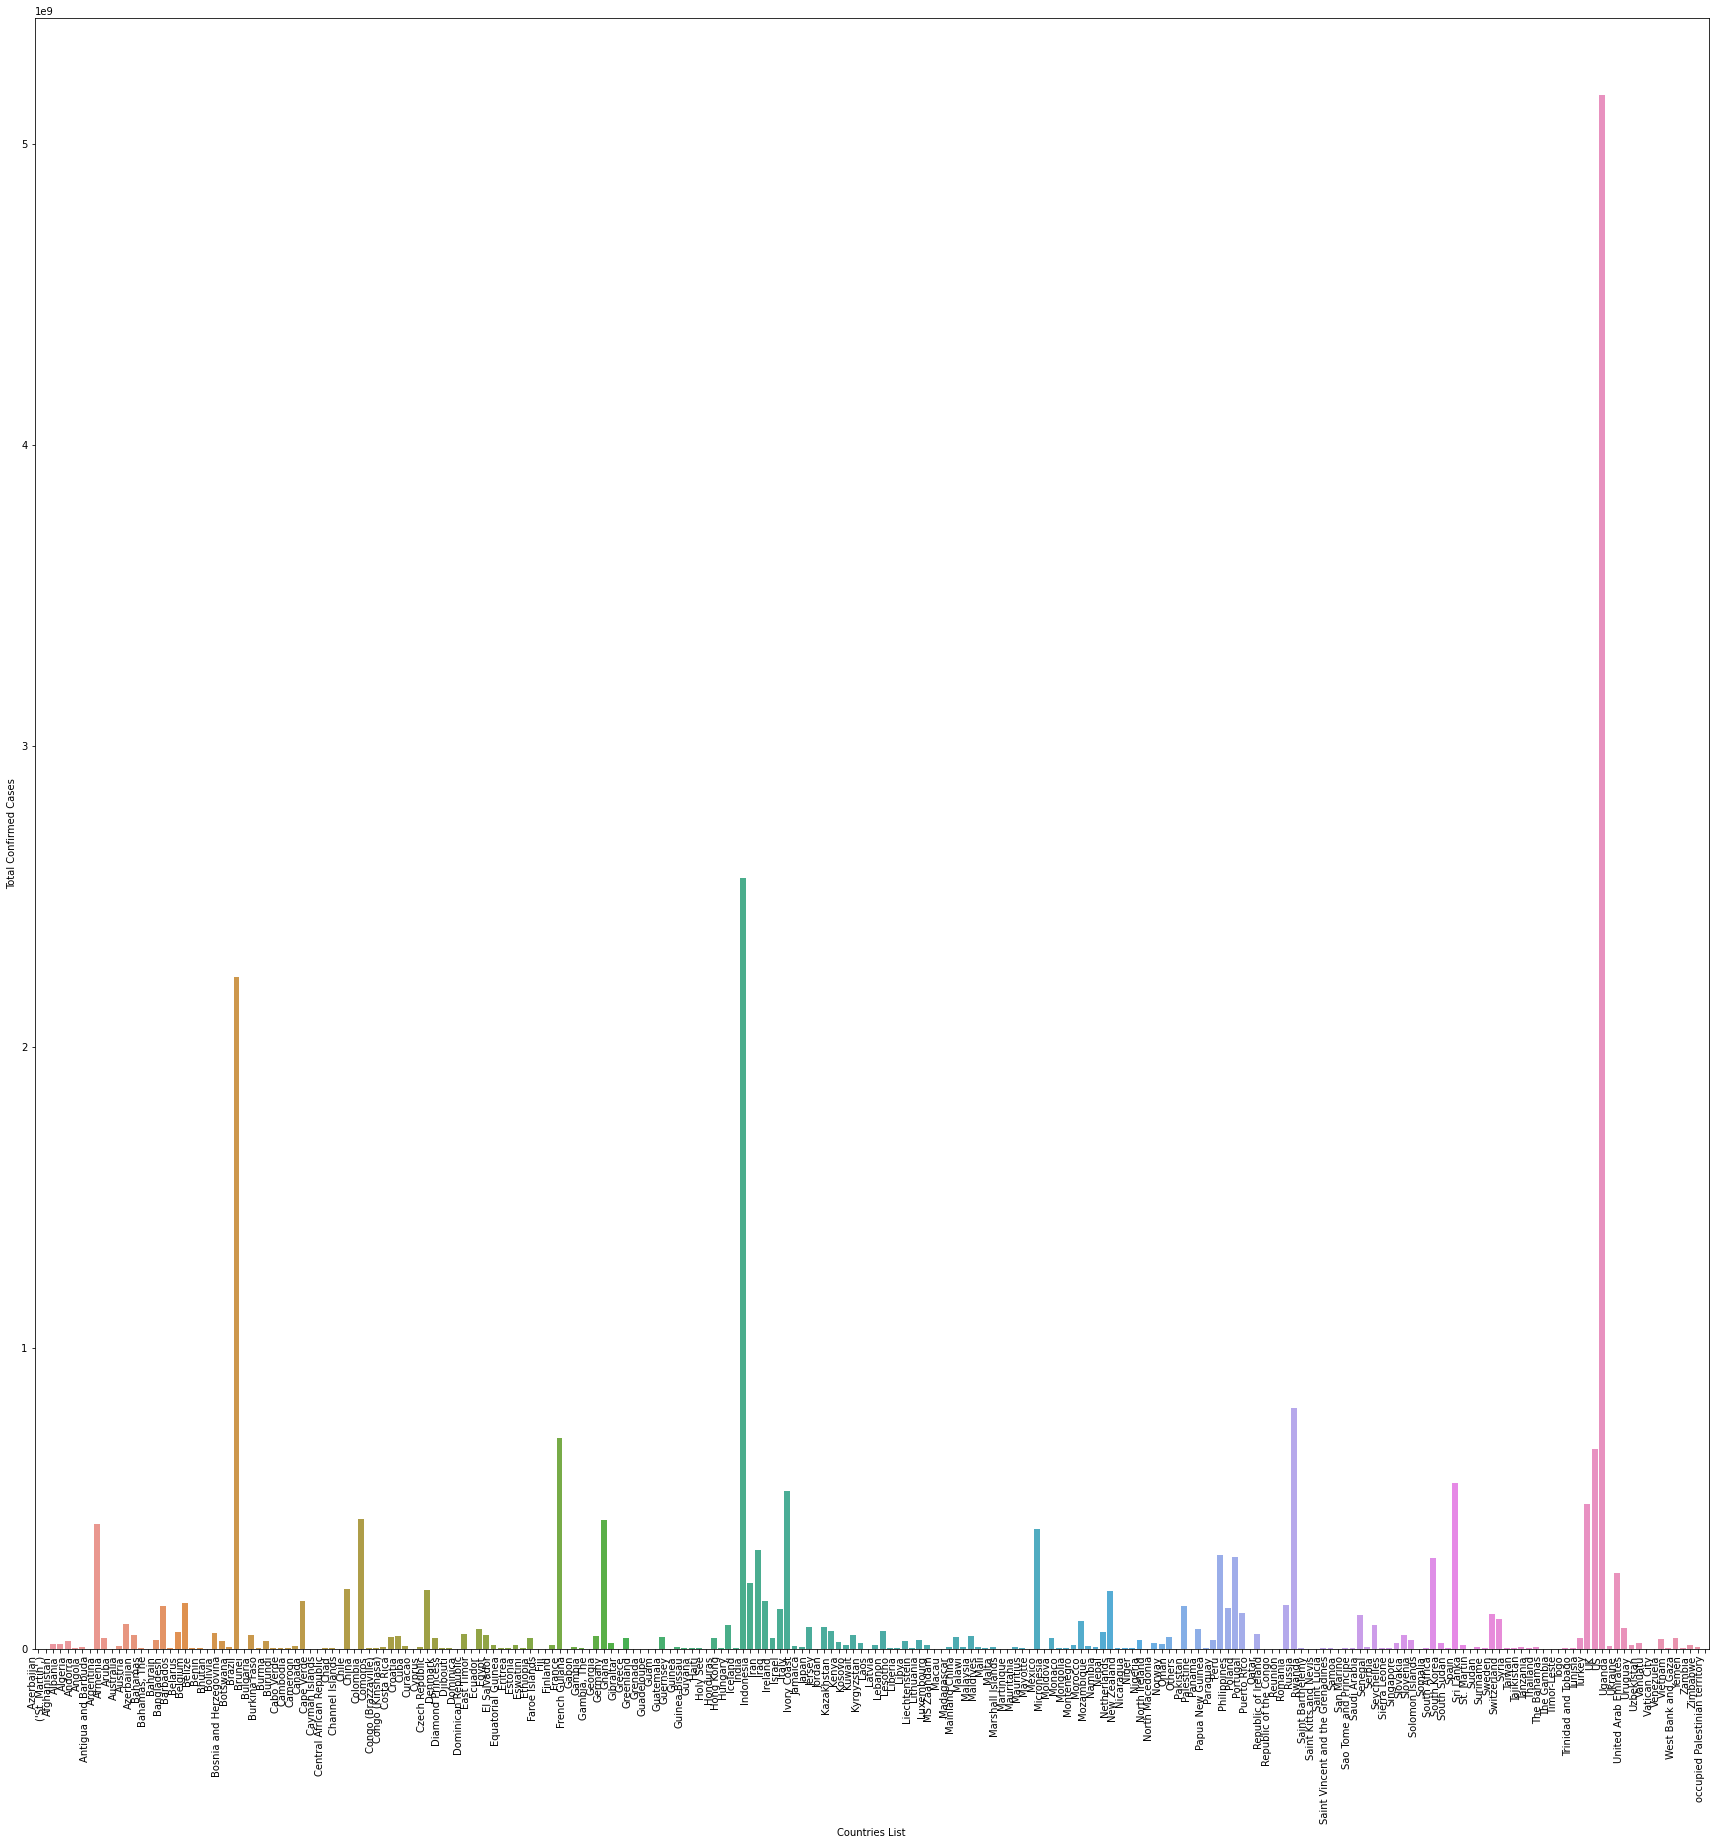

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig_dims = (30,30)
fig, ax = plt.subplots(figsize=fig_dims)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.set(xlabel='Countries List', ylabel='Total Confirmed Cases')
sns.barplot(x=country_list_confirmed,y= ConfirmedCasesCountrywise,ax=ax)

In [ ]:
ListOfConfirmedCases = Confirmed_Recovered_Dead_Dataframe.sort_values(by="ConfirmedCasesCountrywise", ascending=False)
print("The Top 7 countries with the Highest confirmed cases are:")
ListOfConfirmedCases[['country_list_confirmed', 'ConfirmedCasesCountrywise']].head(7)

The Top 7 countries with the Highest confirmed cases are:


,country_list_confirmed,ConfirmedCasesCountrywise
213,US,5.160430e+09
96,India,2.561169e+09
27,Brazil,2.231592e+09
171,Russia,7.986731e+08
71,France,6.988157e+08
212,UK,6.632322e+08
193,Spain,5.516789e+08


Creating Bar Plots to understand the number of deaths in each country

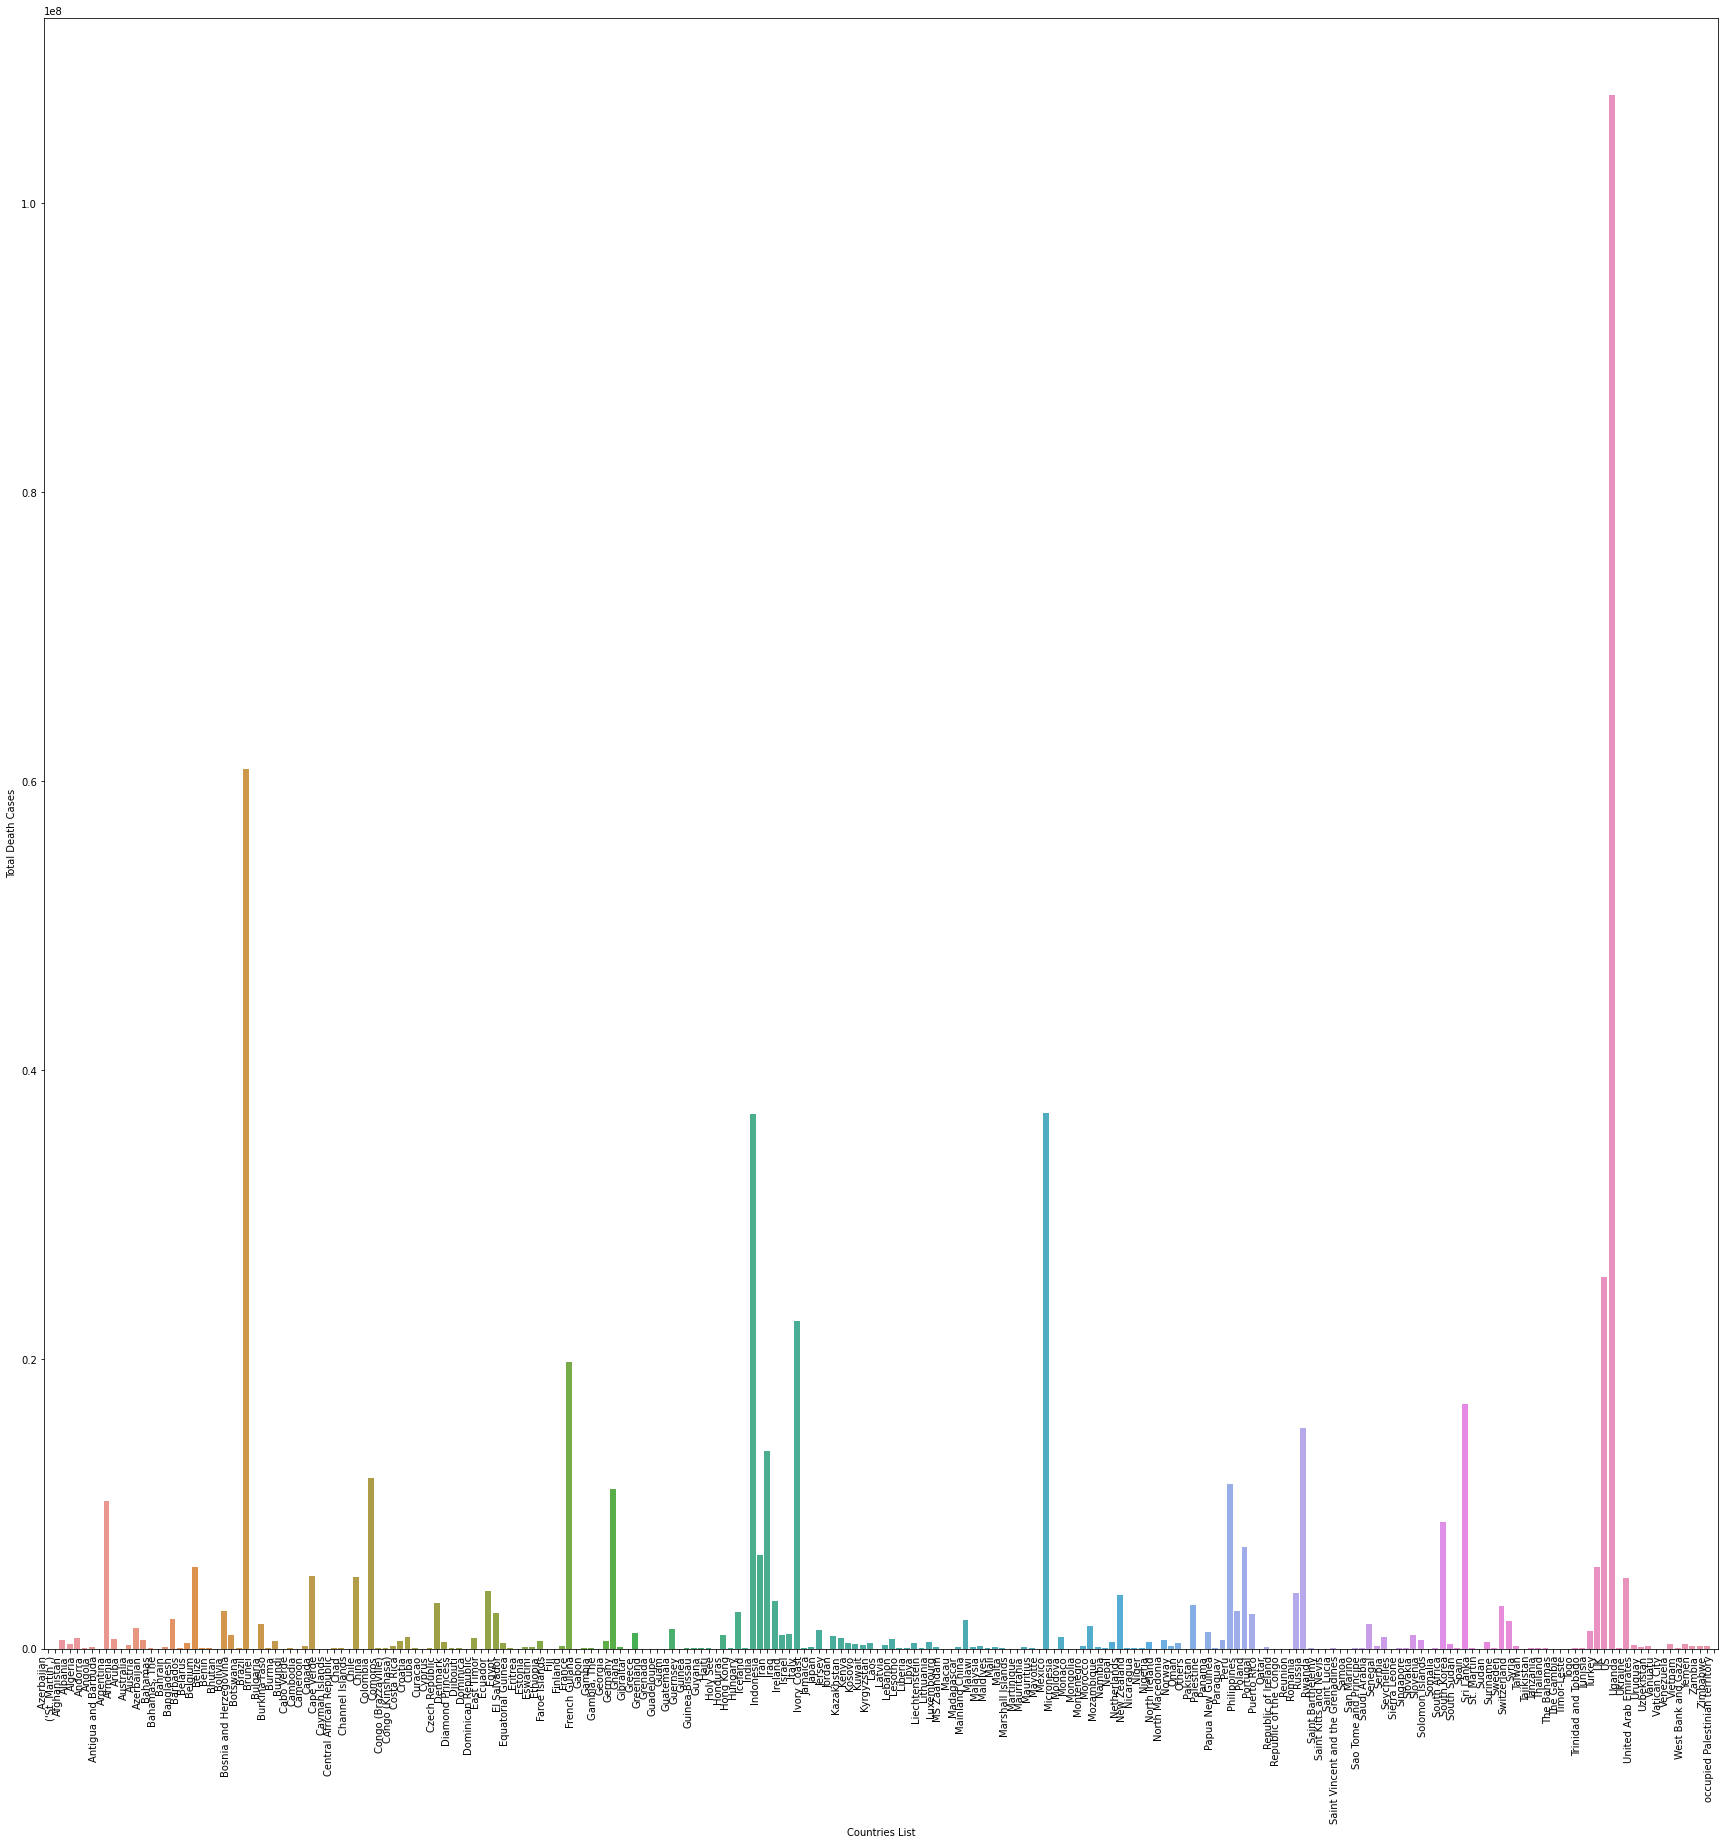

In [ ]:
fig_dims = (30,30)
fig, ax = plt.subplots(figsize=fig_dims)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.set(xlabel='Countries List', ylabel='Total Death Cases')
sns.barplot(x=Country_Region,y= DeathsCountrywise,ax=ax)

In [ ]:
ListOfConfirmedCases = Confirmed_Recovered_Dead_Dataframe.sort_values(by="DeathsCountrywise", ascending=False)
print("The Top 7 countries with the Highest Death cases are:")
ListOfConfirmedCases[['country_list_death', 'DeathsCountrywise']].head(7)

The Top 7 countries with the Highest Death cases are:


,country_list_death,DeathsCountrywise
213,US,107452695.0
27,Brazil,60861917.0
136,Mexico,37056047.0
96,India,37005858.0
212,UK,25717909.0
102,Italy,22651691.0
71,France,19812860.0


Creating Bar Plots to understand the number of recovered in each country

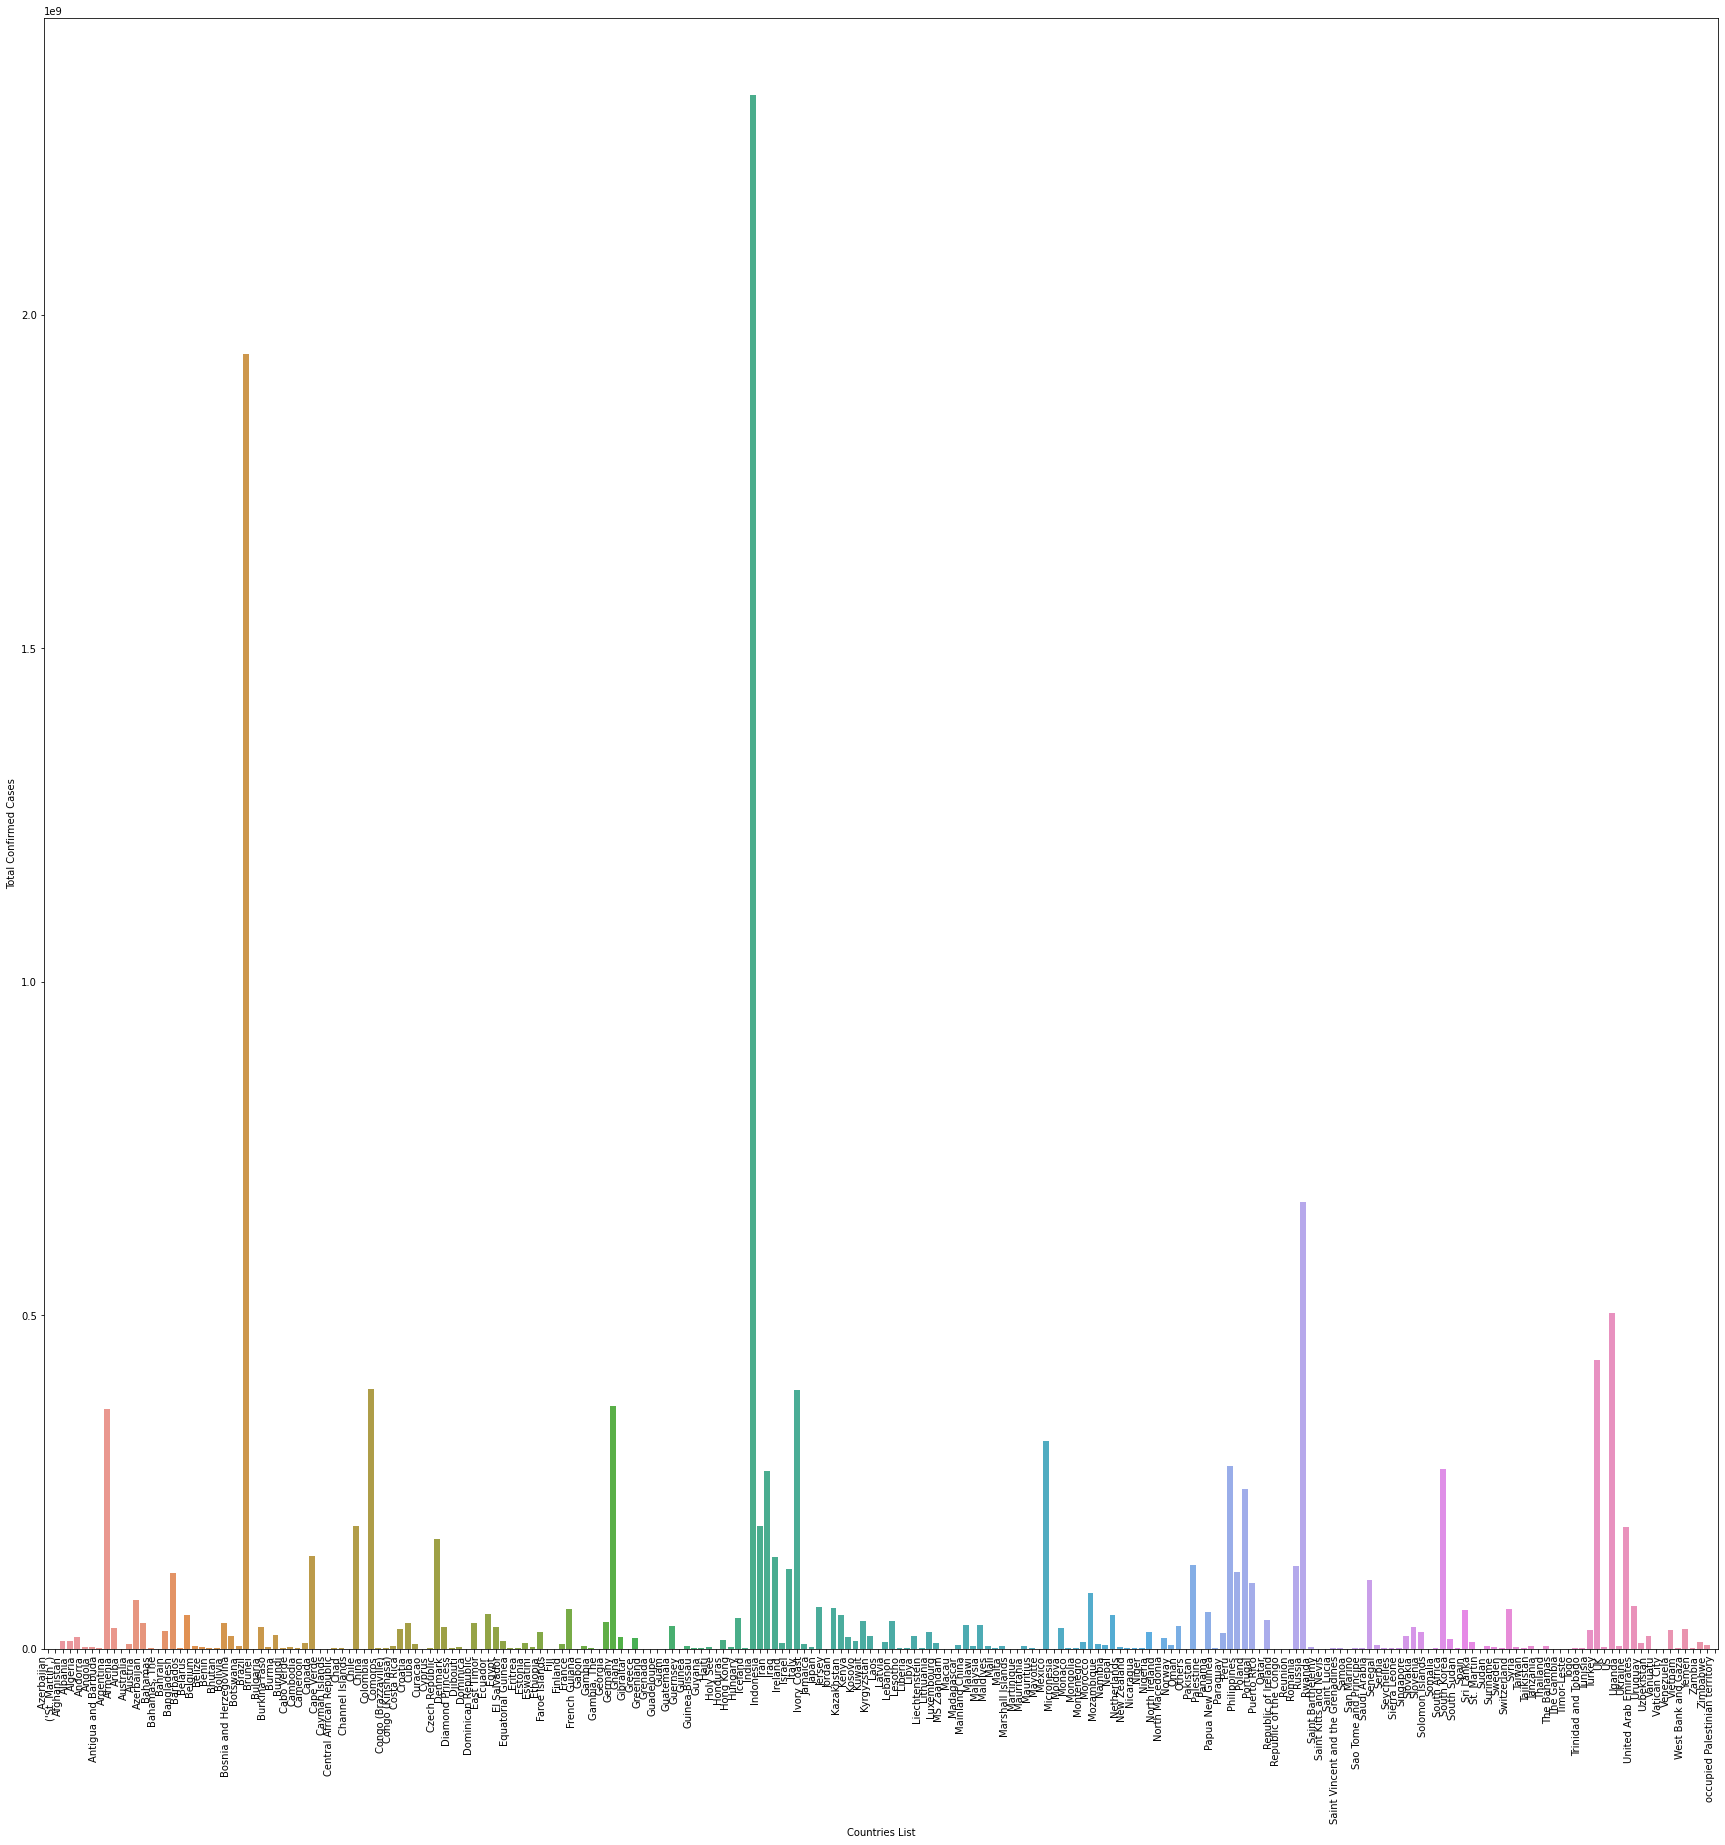

In [ ]:
fig_dims = (30,30)
fig, ax = plt.subplots(figsize=fig_dims)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.set(xlabel='Countries List', ylabel='Total Confirmed Cases')
sns.barplot(x=country_list_recovered,y= RecoveredCountrywise,ax=ax)

In [ ]:
ListOfConfirmedCases = Confirmed_Recovered_Dead_Dataframe.sort_values(by="RecoveredCountrywise", ascending=False)
print("The Top 7 countries with the Highest Recovered cases are:")
ListOfConfirmedCases[['country_list_confirmed', 'RecoveredCountrywise']].head(7)

The Top 7 countries with the Highest Recovered cases are:


,country_list_confirmed,RecoveredCountrywise
96,India,2.328845e+09
27,Brazil,1.940568e+09
171,Russia,6.690869e+08
213,US,5.033710e+08
211,Turkey,4.325473e+08
44,Colombia,3.898092e+08
102,Italy,3.880458e+08


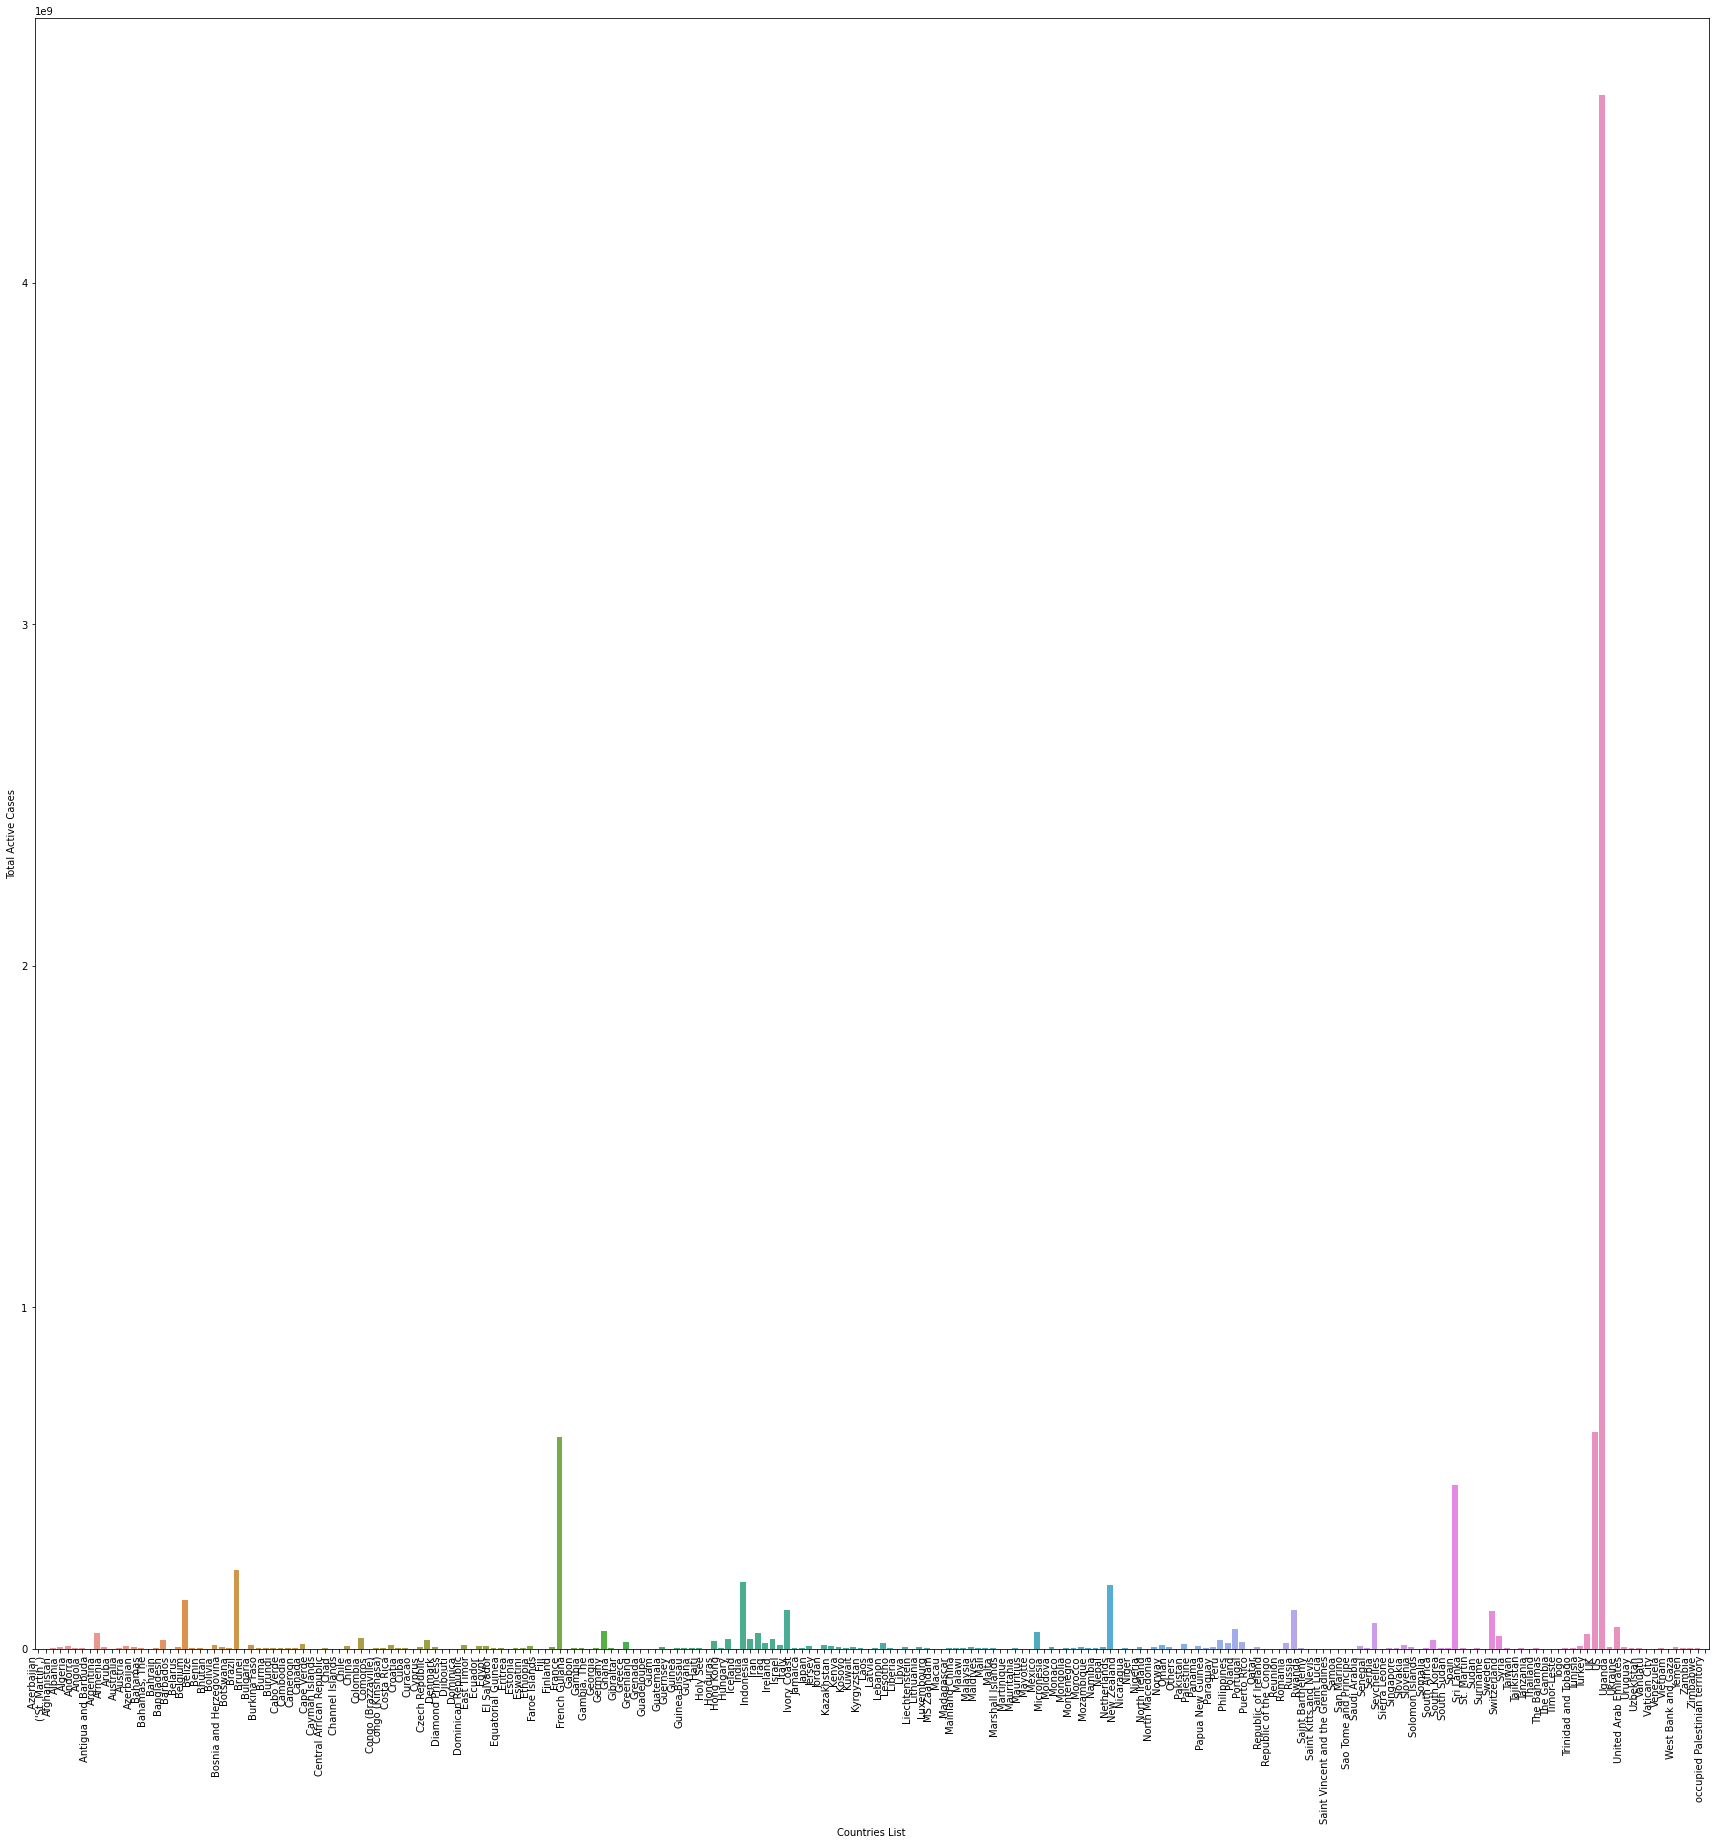

In [ ]:
fig_dims = (30,30)
fig, ax = plt.subplots(figsize=fig_dims)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.set(xlabel='Countries List', ylabel='Total Active Cases')
sns.barplot(x=country_list_active,y= ActiveCountrywise,ax=ax)

In [ ]:
ListOfConfirmedCases = Confirmed_Recovered_Dead_Dataframe.sort_values(by="ActiveCountrywise", ascending=False)
print("The Top 7 countries with the Highest Active cases are:")
ListOfConfirmedCases[['country_list_active', 'ActiveCountrywise']].head(7)

The Top 7 countries with the Highest Active cases are:


,country_list_active,ActiveCountrywise
213,US,4.549606e+09
212,UK,6.355978e+08
71,France,6.198089e+08
193,Spain,4.776212e+08
27,Brazil,2.301619e+08
96,India,1.953179e+08
146,Netherlands,1.849785e+08


In [ ]:
ConfirmedCasesCountrywise = []
country_list_confirmed = []
for country in Country_Region:
  ConfirmedCasesCountrywise.append(Covid_Dataset.loc[Covid_Dataset['Country_Region'] == str(country), 'Confirmed'].max())
  country_list_confirmed.append(country)

DeathsCountrywise = []
country_list_death = []
for country in Country_Region:
  DeathsCountrywise.append(Covid_Dataset.loc[Covid_Dataset['Country_Region'] == str(country), 'Deaths'].max())
  country_list_death.append(country)


country_list_recovered = []
RecoveredCountrywise = []
for country in Country_Region:
  RecoveredCountrywise.append(Covid_Dataset.loc[Covid_Dataset['Country_Region'] == str(country), 'Recovered'].max())
  country_list_recovered.append(country)

country_list_active =[]
ActiveCountrywise = []
for country in Country_Region:
  ActiveCountrywise.append(Covid_Dataset.loc[Covid_Dataset['Country_Region'] == str(country), 'Active'].max())
  country_list_active.append(country)
  
Number_Confirmed_Recovered_Dead = {'country_list_confirmed': country_list_confirmed,
                                   'ConfirmedCasesCountrywise': ConfirmedCasesCountrywise,
                                   'country_list_death': country_list_death,
                                   'DeathsCountrywise': DeathsCountrywise,
                                   'country_list_recovered': country_list_recovered,
                                   'RecoveredCountrywise': RecoveredCountrywise,
                                   'ActiveCountrywise': ActiveCountrywise,
                                   'country_list_active': country_list_active}
                                   

Confirmed_Recovered_Dead_Dataframe = pd.DataFrame(Number_Confirmed_Recovered_Dead)

In [ ]:
ListOfConfirmedCases = Confirmed_Recovered_Dead_Dataframe.sort_values(by="ConfirmedCasesCountrywise", ascending=False)
print("The Top 7 countries with the Highest confirmed cases are:")
ListOfConfirmedCases[['country_list_confirmed', 'ConfirmedCasesCountrywise']].head(7)

The Top 7 countries with the Highest confirmed cases are:


,country_list_confirmed,ConfirmedCasesCountrywise
71,France,5605532.0
211,Turkey,4875388.0
96,India,4665754.0
212,UK,3861901.0
213,US,3744830.0
8,Argentina,3005259.0
27,Brazil,2923367.0


In [ ]:
ListOfConfirmedCases = Confirmed_Recovered_Dead_Dataframe.sort_values(by="DeathsCountrywise", ascending=False)
print("The Top 7 countries with the Highest Death cases are:")
ListOfConfirmedCases[['country_list_death', 'DeathsCountrywise']].head(7)

The Top 7 countries with the Highest Death cases are:


,country_list_death,DeathsCountrywise
212,UK,112182.0
71,France,104093.0
27,Brazil,97058.0
98,Iran,72484.0
96,India,69615.0
163,Poland,68068.0
8,Argentina,64252.0


In [ ]:
ListOfConfirmedCases = Confirmed_Recovered_Dead_Dataframe.sort_values(by="RecoveredCountrywise", ascending=False)
print("The Top 7 countries with the Highest Recovered cases are:")
ListOfConfirmedCases[['country_list_confirmed', 'RecoveredCountrywise']].head(7)

The Top 7 countries with the Highest Recovered cases are:


,country_list_confirmed,RecoveredCountrywise
213,US,6399531.0
211,Turkey,4480381.0
96,India,3930302.0
8,Argentina,2676197.0
27,Brazil,2588973.0
163,Poland,2520968.0
98,Iran,1988165.0


In [ ]:
ListOfConfirmedCases = Confirmed_Recovered_Dead_Dataframe.sort_values(by="ActiveCountrywise", ascending=False)
print("The Top 7 countries with the Highest Active cases are:")
ListOfConfirmedCases[['country_list_active', 'ActiveCountrywise']].head(7)

The Top 7 countries with the Highest Active cases are:


,country_list_active,ActiveCountrywise
71,France,5193939.0
212,UK,3749719.0
213,US,3682891.0
211,Turkey,1306587.0
44,Colombia,853900.0
161,Peru,806038.0
96,India,701614.0


Lets calculate the percentages of Max Confirmed, Max Active, Max Recoverey and Deaths against total population for the following countries. We chose these countries because they are listed in Max Confirmed, Max Active, Max deaths and Max Recovery lists. 


1.   France
2.   Turkey
3.   India
4.   UK
5.   USA
6.   Argentina
7.   Brazil
8.   Poland
9.   Iran

We choose these countries because they have been listed as either the top 5 countries in Recovered, Confirmed, Death or Active cases list



First Let us calculate the confirmed, recovered, death and active cases against the total population of the countries.
Given below is the list of population of the individual countries.
[source] - https://www.worldometers.info/population/world/

1.   France - 65,405,472
2.   Turkey - 85,180,683
3.   India - 1,392,566,171
4.   UK - 68,213,549
5.   USA - 332,787,339
6.   Argentina - 45,579,317
7.   Brazil - 213,951,731
8.   Poland - 37,808,957
9.   Iran - 83,992,949


In [ ]:
#populations of Different Countries are
Population_France = 65405472
Population_Turkey = 85180683
Population_India = 1392566171
Population_UK = 68213549
Population_USA = 32787339
Population_Argentina = 45579317
Population_Brazil = 213951731
Population_Poland = 37808957
Population_Iran = 83992949
CountryList = ['France', 'Turkey', 'India', 'UK', 'US', 'Argentina', 'Brazil', 'Poland', 'Iran']
PopulationList = [Population_France, Population_Turkey, Population_India, Population_UK, Population_USA, Population_Argentina, Population_Brazil, Population_Poland, Population_Iran]

Confirmed_Percentage_Population = []
Recovered_Percentage_Population = []
Death_Percentage_Population = []
Active_Percentage_Population = []

for i in range(len(CountryList)):
  Confirmed_Percentage_Population.append((Covid_Dataset.loc[Covid_Dataset['Country_Region'] == str(CountryList[i]), 'Confirmed'].max() / PopulationList[i]) * 100)
  Recovered_Percentage_Population.append((Covid_Dataset.loc[Covid_Dataset['Country_Region'] == str(CountryList[i]), 'Recovered'].max() / PopulationList[i]) * 100)
  Death_Percentage_Population.append((Covid_Dataset.loc[Covid_Dataset['Country_Region'] == str(CountryList[i]), 'Deaths'].max() / PopulationList[i]) * 100)
  Active_Percentage_Population.append((Covid_Dataset.loc[Covid_Dataset['Country_Region'] == str(CountryList[i]), 'Active'].max() / PopulationList[i]) * 100)

Percentage_Confirmed_Recovered_Death_Active = {
                                              "Confirmed_Percentage_Population" : Confirmed_Percentage_Population,
                                               "Recovered_Percentage_Population" : Recovered_Percentage_Population,
                                               "Death_Percentage_Population" : Death_Percentage_Population,
                                               "Active_Percentage_Population" : Active_Percentage_Population
                                              }
Percentage_Confirmed_Recovered_Death_Active = pd.DataFrame(Percentage_Confirmed_Recovered_Death_Active, index=CountryList)
print("The percentages of Confirmed, Recovered, Death and Active cases against the population of different countries are as follows")
Percentage_Confirmed_Recovered_Death_Active.head(9)

The percentages of Confirmed, Recovered, Death and Active cases against the population of different countries are as follows


,Confirmed_Percentage_Population,Recovered_Percentage_Population,Death_Percentage_Population,Active_Percentage_Population
France,8.570433,0.470144,0.159150,7.941138
Turkey,5.723584,5.259856,0.047950,1.533901
India,0.335047,0.282234,0.004999,0.050383
UK,5.661487,0.006137,0.164457,5.497030
US,11.421573,19.518299,0.189335,11.232662
Argentina,6.593471,5.871516,0.140967,0.633976
Brazil,1.366368,1.210073,0.045364,0.151258
Poland,7.414203,6.667648,0.180031,1.163838
Iran,3.017938,2.367062,0.086298,0.564578


From the results above one can see that for US the percentage of recovered cases is higher than the confirmed cases, this shows that there is some discrepancy in the data provided.

In [ ]:
ConfirmedList = []
DeathsList = []
RecoveredList =[]
ActiveList = []

DeathPercentage = []
RecoveredPercentage = []
ActivePercentage = []
for country in CountryList:
  ConfirmedList.append(Covid_Dataset.loc[Covid_Dataset['Country_Region'] == country, 'Confirmed'].max())
  DeathsList.append(Covid_Dataset.loc[Covid_Dataset['Country_Region'] == country, 'Deaths'].max())
  RecoveredList.append(Covid_Dataset.loc[Covid_Dataset['Country_Region'] == country, 'Recovered'].max())
  ActiveList.append(Covid_Dataset.loc[Covid_Dataset['Country_Region'] == country, 'Active'].max())
  DeathPercentage.append((Covid_Dataset.loc[Covid_Dataset['Country_Region'] == country, 'Deaths'].max() / Covid_Dataset.loc[Covid_Dataset['Country_Region'] == country, 'Confirmed'].max()) * 100)
  RecoveredPercentage.append((Covid_Dataset.loc[Covid_Dataset['Country_Region'] == country, 'Recovered'].max() / Covid_Dataset.loc[Covid_Dataset['Country_Region'] == country, 'Confirmed'].max()) * 100)
  ActivePercentage.append((Covid_Dataset.loc[Covid_Dataset['Country_Region'] == country, 'Active'].max() / Covid_Dataset.loc[Covid_Dataset['Country_Region'] == country, 'Confirmed'].max()) * 100)
  

DeathRecoveredActiveTopCountries = {"CountryList": CountryList,
                                    "ConfirmedList":ConfirmedList,
                                    "DeathsList": DeathsList,
                                    "RecoveredList": RecoveredList,
                                    "ActiveList": ActiveList}
PercentageCases =                   {"CountryList": CountryList,
                                     "DeathPercentage": DeathPercentage,
                                    "RecoveredPercentage": RecoveredPercentage,
                                    "ActivePercentage": ActivePercentage                              
                                    }
DeathRecoveredActiveTopCountries = pd.DataFrame(DeathRecoveredActiveTopCountries)
PercentageCases = pd.DataFrame(PercentageCases)
#DeathRecoveredActiveTopCountries.head(9)#"Total": 
PercentageCases.head(9)


,CountryList,DeathPercentage,RecoveredPercentage,ActivePercentage
0,France,1.856969,5.485652,92.657378
1,Turkey,0.837759,91.897937,26.799652
2,India,1.492042,84.237232,15.037527
3,UK,2.904839,0.108392,97.095161
4,US,1.657699,170.889760,98.346013
5,Argentina,2.137985,89.050461,9.615211
6,Brazil,3.320076,88.561340,11.070112
7,Poland,2.428196,89.930734,15.697411
8,Iran,2.859493,78.433086,18.707421


In [ ]:
SumTotalCases = {"CountryList": CountryList,
                "SumTotalCases" : PercentageCases['ActivePercentage'] + PercentageCases['RecoveredPercentage'] + PercentageCases['DeathPercentage']}
SumTotalCases = pd.DataFrame(SumTotalCases)
SumTotalCases.head(9)

,CountryList,SumTotalCases
0,France,100.000000
1,Turkey,119.535348
2,India,100.766800
3,UK,100.108392
4,US,270.893472
5,Argentina,100.803658
6,Brazil,102.951528
7,Poland,108.056341
8,Iran,100.000000


We see that there is discrepency in the data for Turkey, US, Poland and Brazil. We can verify this in our multivariate analysis

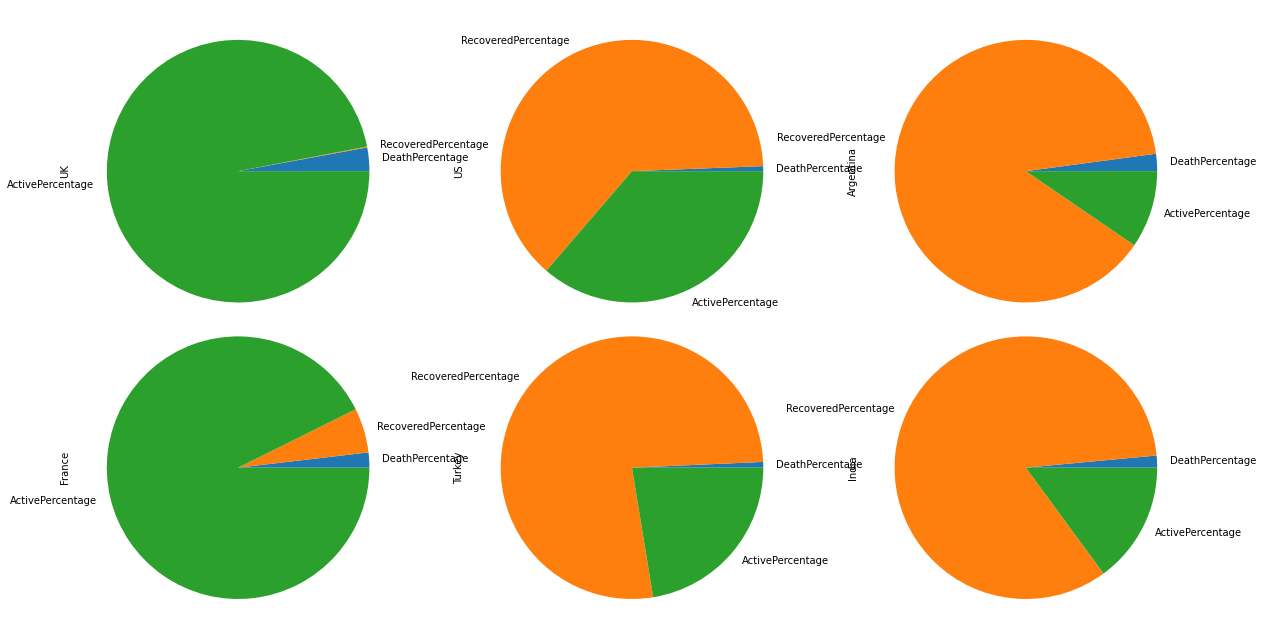

In [ ]:
df = pd.DataFrame({
      CountryList[0]: PercentageCases.iloc[0,1:].values,
      CountryList[1]: PercentageCases.iloc[1,1:].values,
      CountryList[2]: PercentageCases.iloc[2,1:].values,
      CountryList[3]: PercentageCases.iloc[3,1:].values,
      CountryList[4]: PercentageCases.iloc[4,1:].values,
      CountryList[5]: PercentageCases.iloc[5,1:].values,
      CountryList[6]: PercentageCases.iloc[6,1:].values,
      CountryList[7]: PercentageCases.iloc[7,1:].values,
      CountryList[8]: PercentageCases.iloc[8,1:].values
      },
      index=['DeathPercentage',	'RecoveredPercentage', 	'ActivePercentage'])

fig = plt.figure()

# Divide the figure into a first digit corresponds to 3 Degree Figure, 2nd digit is column number, 3rd digit is row number
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
ax4 = fig.add_subplot(231)
ax5 = fig.add_subplot(232)
ax6 = fig.add_subplot(233)

df.plot.pie(y=CountryList[0], figsize=(20, 20), ax=ax1, legend=False)
df.plot.pie(y=CountryList[1], figsize=(20, 20), ax=ax2, legend=False)
df.plot.pie(y=CountryList[2], figsize=(20, 20), ax=ax3, legend=False)
df.plot.pie(y=CountryList[3], figsize=(20, 20), ax=ax4, legend=False)
df.plot.pie(y=CountryList[4], figsize=(20, 20), ax=ax5, legend=False)
df.plot.pie(y=CountryList[5], figsize=(20, 20), ax=ax6, legend=False)

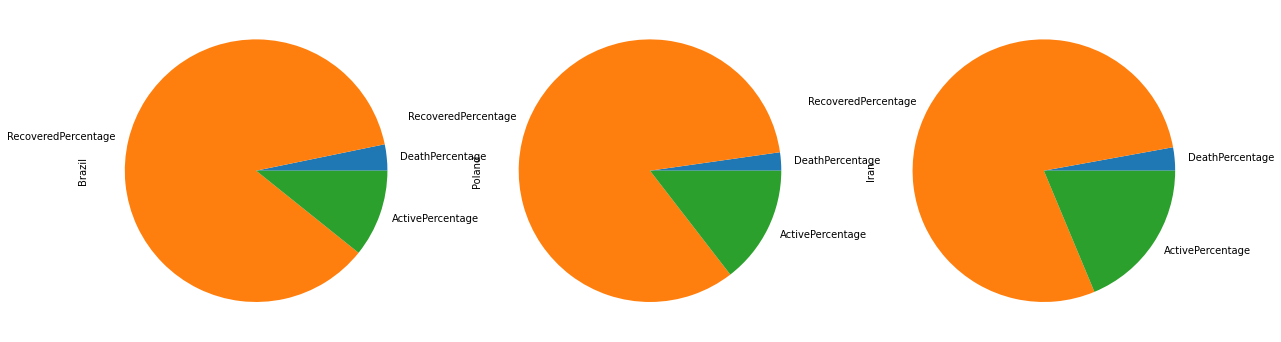

In [ ]:
fig = plt.figure()
# Divide the figure 1*3 images, 1st place, 2nd place, etc
ax7 = fig.add_subplot(131)
ax8 = fig.add_subplot(132)
ax9 = fig.add_subplot(133)
df.plot.pie(y=CountryList[6], figsize=(20, 20), ax=ax7, legend=False)
df.plot.pie(y=CountryList[7], figsize=(20, 20), ax=ax8, legend=False)
df.plot.pie(y=CountryList[8], figsize=(20, 20), ax=ax9, legend=False)

Insights:

**Countries with high Rate of Recoveries:**

1 - USA

2 - Turkey

3 - Poland

4 - Argentina

5 - Brazil

6 - India

There can be several factors behind this rate of recoveries, such as following up and updating the data for recovered patients, the median age of the population in these countries are between 28 - 39 years [source: worldometer], it can also be the improved medical services available in the respective country. However one can be sure of these results if we could further have the data regarding the patient age, medical facilities provided to all population, etc.  

**Countries with high rate of active cases:**

1 - USA

2 - UK

3 - France

4 - Turkey

5 - Iran

One can observe that the active cases in the above mentioned countries is high irrespective of the improved health care services provided, this can also be because the database was not updated to take into account the patients who have recovered from the viral fever.

**Countries with high rate of Deaths:**

1 - Brazil

2 - UK 

3 - Iran

4 - Poland

5 - Argentina

USA has high rate of recoveries and high active cases too, however UK has a high death rate and high active cases.


**We will now study 3 countries USA, India and Brazil.**

**Bi-Variate Analysis and Multivariate Analysis**



In [ ]:
#Let us extract the data for USA, India and Brazil
Covid_Dataset_USA = Covid_Dataset[Covid_Dataset['Country_Region'] == 'US']
Covid_Dataset_USA.head(5)

,SNo,ObservationDate,Province_State,Country_Region,Confirmed,Deaths,Recovered,Active
31,32,2020-01-22,Washington,US,1.0,0.0,0.0,1.0
70,71,2020-01-23,Washington,US,1.0,0.0,0.0,1.0
119,120,2020-01-24,Washington,US,1.0,0.0,0.0,1.0
120,121,2020-01-24,Chicago,US,1.0,0.0,0.0,1.0
161,162,2020-01-25,Washington,US,1.0,0.0,0.0,1.0


In [ ]:
#Let us extract the data for USA, India and Brazil
Covid_Dataset_India = Covid_Dataset[Covid_Dataset['Country_Region'] == 'India']
Covid_Dataset_India.head(5)

,SNo,ObservationDate,Province_State,Country_Region,Confirmed,Deaths,Recovered,Active
438,439,2020-01-30,Unknown,India,1.0,0.0,0.0,1.0
500,501,2020-01-31,Unknown,India,1.0,0.0,0.0,1.0
557,558,2020-02-01,Unknown,India,1.0,0.0,0.0,1.0
618,619,2020-02-02,Unknown,India,2.0,0.0,0.0,2.0
684,685,2020-02-03,Unknown,India,3.0,0.0,0.0,3.0


In [ ]:
#Let us extract the data for USA, India and Brazil
Covid_Dataset_Brazil = Covid_Dataset[Covid_Dataset['Country_Region'] == 'Brazil']
Covid_Dataset_Brazil.head(5)

,SNo,ObservationDate,Province_State,Country_Region,Confirmed,Deaths,Recovered,Active
83,84,2020-01-23,Unknown,Brazil,0.0,0.0,0.0,0.0
2490,2491,2020-02-26,Unknown,Brazil,1.0,0.0,0.0,1.0
2595,2596,2020-02-27,Unknown,Brazil,1.0,0.0,0.0,1.0
2705,2706,2020-02-28,Unknown,Brazil,1.0,0.0,0.0,1.0
2814,2815,2020-02-29,Unknown,Brazil,2.0,0.0,0.0,2.0


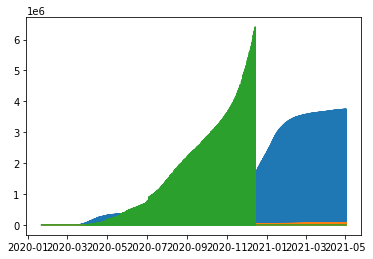

In [ ]:
plt.plot(Covid_Dataset_USA['ObservationDate'], Covid_Dataset_USA['Confirmed'])
plt.plot(Covid_Dataset_USA['ObservationDate'], Covid_Dataset_USA['Deaths'])
plt.plot(Covid_Dataset_USA['ObservationDate'], Covid_Dataset_USA['Recovered'])
plt.show()

In [ ]:
import numpy as np
np.max(Covid_Dataset_USA['Confirmed'].values)